# Experiment 6: Implementation of K-Nearest Neighbors Algorithm from Scratch

## Table of Contents
1. Setup and Imports
2. Data Handling
3. Utility Functions
4. KNN Classifier Implementation
5. Exploratory Data Analysis
6. Model Integration and Evaluation
7. Analysis and Conclusions

# 1. Setup and Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from ucimlrepo import fetch_ucirepo
print("All libraries imported successfully!")

All libraries imported successfully!


# 2. Data Handling

Loading and preprocessing the Iris dataset from UCI repository.

In [2]:
def load_iris_data():
    """
    Load and preprocess the Iris dataset from UCI repository.
    Returns: X (features) and y (labels) as NumPy arrays
    """
    # Fetch dataset
    iris = fetch_ucirepo(id=53)
    
    # Extract features and targets
    X = iris.data.features
    y = iris.data.targets
    
    # Preprocess target labels - remove 'Iris-' prefix
    y = y['class'].str.replace('Iris-', '', regex=False)
    
    # Convert to NumPy arrays
    X = X.to_numpy()
    y = y.to_numpy()
    
    print(f"Dataset loaded successfully!")
    print(f"Features shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Unique classes: {np.unique(y)}")
    
    return X, y

# Load the data
X, y = load_iris_data()

Dataset loaded successfully!
Features shape: (150, 4)
Labels shape: (150,)
Unique classes: ['setosa' 'versicolor' 'virginica']


In [3]:
print("\nFirst 5 samples:")
print("Features:\n", X[:5])
print("Labels:\n", y[:5])



First 5 samples:
Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# 3. Utility Functions 
Implementation of train-test split function.

In [4]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split arrays into random train and test subsets.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Features array
    y : array-like, shape (n_samples,)
        Labels array
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, optional
        Seed for random number generator
    
    Returns:
    --------
    X_train, X_test, y_train, y_test : arrays
        Split data
    """
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)
    
    # Get number of samples
    n_samples = X.shape[0]
    
    # Generate shuffled indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Calculate split point
    test_size_count = int(n_samples * test_size)
    
    # Split indices
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]
    
    # Split data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Test the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Results:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training labels distribution: {np.unique(y_train, return_counts=True)}")
print(f"Test labels distribution: {np.unique(y_test, return_counts=True)}")


Train-Test Split Results:
Training set size: 120
Test set size: 30
Training labels distribution: (array(['setosa', 'versicolor', 'virginica'], dtype=object), array([40, 41, 39]))
Test labels distribution: (array(['setosa', 'versicolor', 'virginica'], dtype=object), array([10,  9, 11]))


# 4. KNN Classifier Implementation 
Building the K-Nearest Neighbors classifier from scratch.

In [5]:
def euclidean_distance(x1, x2):
    """
    Calculate Euclidean distance between two points.
    
    Parameters:
    -----------
    x1, x2 : array-like
        Two data points
    
    Returns:
    --------
    distance : float
        Euclidean distance
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))



In [6]:
class KNNClassifier:
    """
    K-Nearest Neighbors Classifier implemented from scratch.
    """
    
    def __init__(self, k=3):
        """
        Initialize KNN classifier.
        
        Parameters:
        -----------
        k : int, default=3
            Number of nearest neighbors to consider
        """
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        """
        Fit the classifier with training data.
        
        Parameters:
        -----------
        X_train : array-like, shape (n_samples, n_features)
            Training features
        y_train : array-like, shape (n_samples,)
            Training labels
        """
        self.X_train = X_train
        self.y_train = y_train
        print(f"Model fitted with {len(X_train)} training samples")
    
    def _predict(self, x):
        """
        Predict class for a single sample.
        
        Parameters:
        -----------
        x : array-like
            A single test sample
        
        Returns:
        --------
        prediction : str or int
            Predicted class label
        """
        # Calculate distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels of k nearest neighbors
        k_nearest_labels = self.y_train[k_indices]
        
        # Return most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X_test):
        """
        Predict classes for test samples.
        
        Parameters:
        -----------
        X_test : array-like, shape (n_samples, n_features)
            Test features
        
        Returns:
        --------
        predictions : array
            Predicted class labels
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)



In [7]:
print("Testing KNN Classifier:")
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(f"Sample predictions: {predictions[:10]}")
print(f"Actual labels: {y_test[:10]}")

Testing KNN Classifier:
Model fitted with 120 training samples
Sample predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Actual labels: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


# 5. Exploratory Data Analysis 

In [23]:
print("="*70)
print("IRIS DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("="*70)
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create DataFrame for easier analysis
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['Species'] = y

print("\n1. DATASET SHAPE AND STRUCTURE")
print("-" * 70)
print(f"Number of samples: {df_iris.shape[0]}")
print(f"Number of features: {df_iris.shape[1] - 1}")
print(f"Features: {feature_names}")

print("\n2. CLASS DISTRIBUTION")
print("-" * 70)
class_counts = df_iris['Species'].value_counts()
print(class_counts)
print(f"\nDataset is {'BALANCED' if class_counts.std() == 0 else 'IMBALANCED'}")

print("\n3. STATISTICAL SUMMARY")
print("-" * 70)
print(df_iris.describe())

print("\n4. MISSING VALUES CHECK")
print("-" * 70)
missing = df_iris.isnull().sum()
print(missing)
print(f"Total missing values: {missing.sum()}")


IRIS DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. DATASET SHAPE AND STRUCTURE
----------------------------------------------------------------------
Number of samples: 150
Number of features: 4
Features: ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

2. CLASS DISTRIBUTION
----------------------------------------------------------------------
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Dataset is BALANCED

3. STATISTICAL SUMMARY
----------------------------------------------------------------------
       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%      

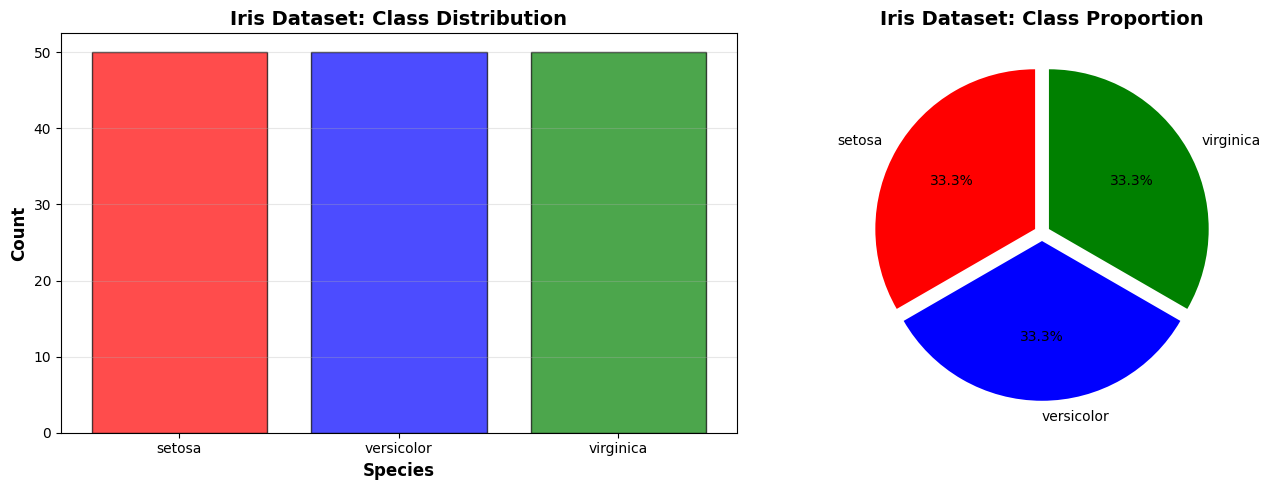

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
species_counts = df_iris['Species'].value_counts()
axes[0].bar(species_counts.index, species_counts.values, color=['red', 'blue', 'green'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Species', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Iris Dataset: Class Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
            colors=['red', 'blue', 'green'], startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Iris Dataset: Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

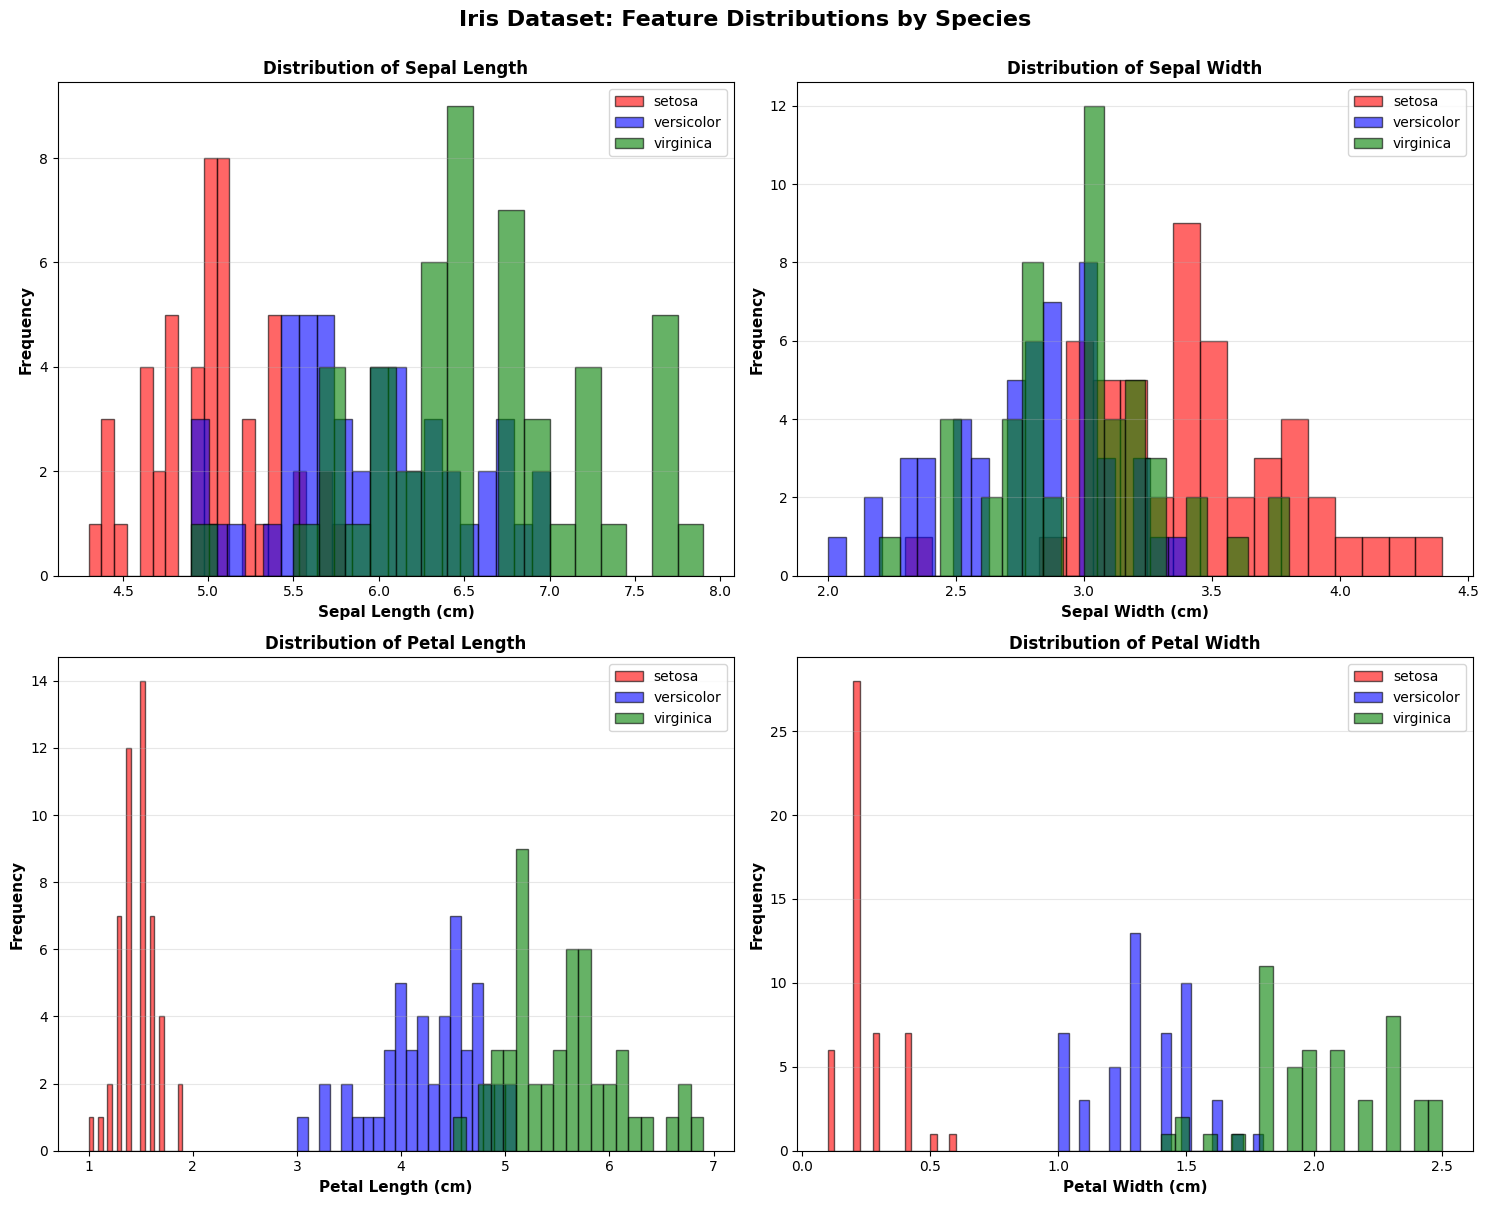

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

for idx, feature in enumerate(feature_names):
    ax = axes[idx]
    
    for species in df_iris['Species'].unique():
        data = df_iris[df_iris['Species'] == species][feature]
        ax.hist(data, bins=20, alpha=0.6, label=species, color=colors[species], edgecolor='black')
    
    ax.set_xlabel(f'{feature} (cm)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Iris Dataset: Feature Distributions by Species', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/2798880048.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_species, labels=['Setosa', 'Versicolor', 'Virginica'],
/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/2798880048.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_species, labels=['Setosa', 'Versicolor', 'Virginica'],
/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/2798880048.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_species, labels=['Setosa', 'Versicolor', 'Virginica'],
/

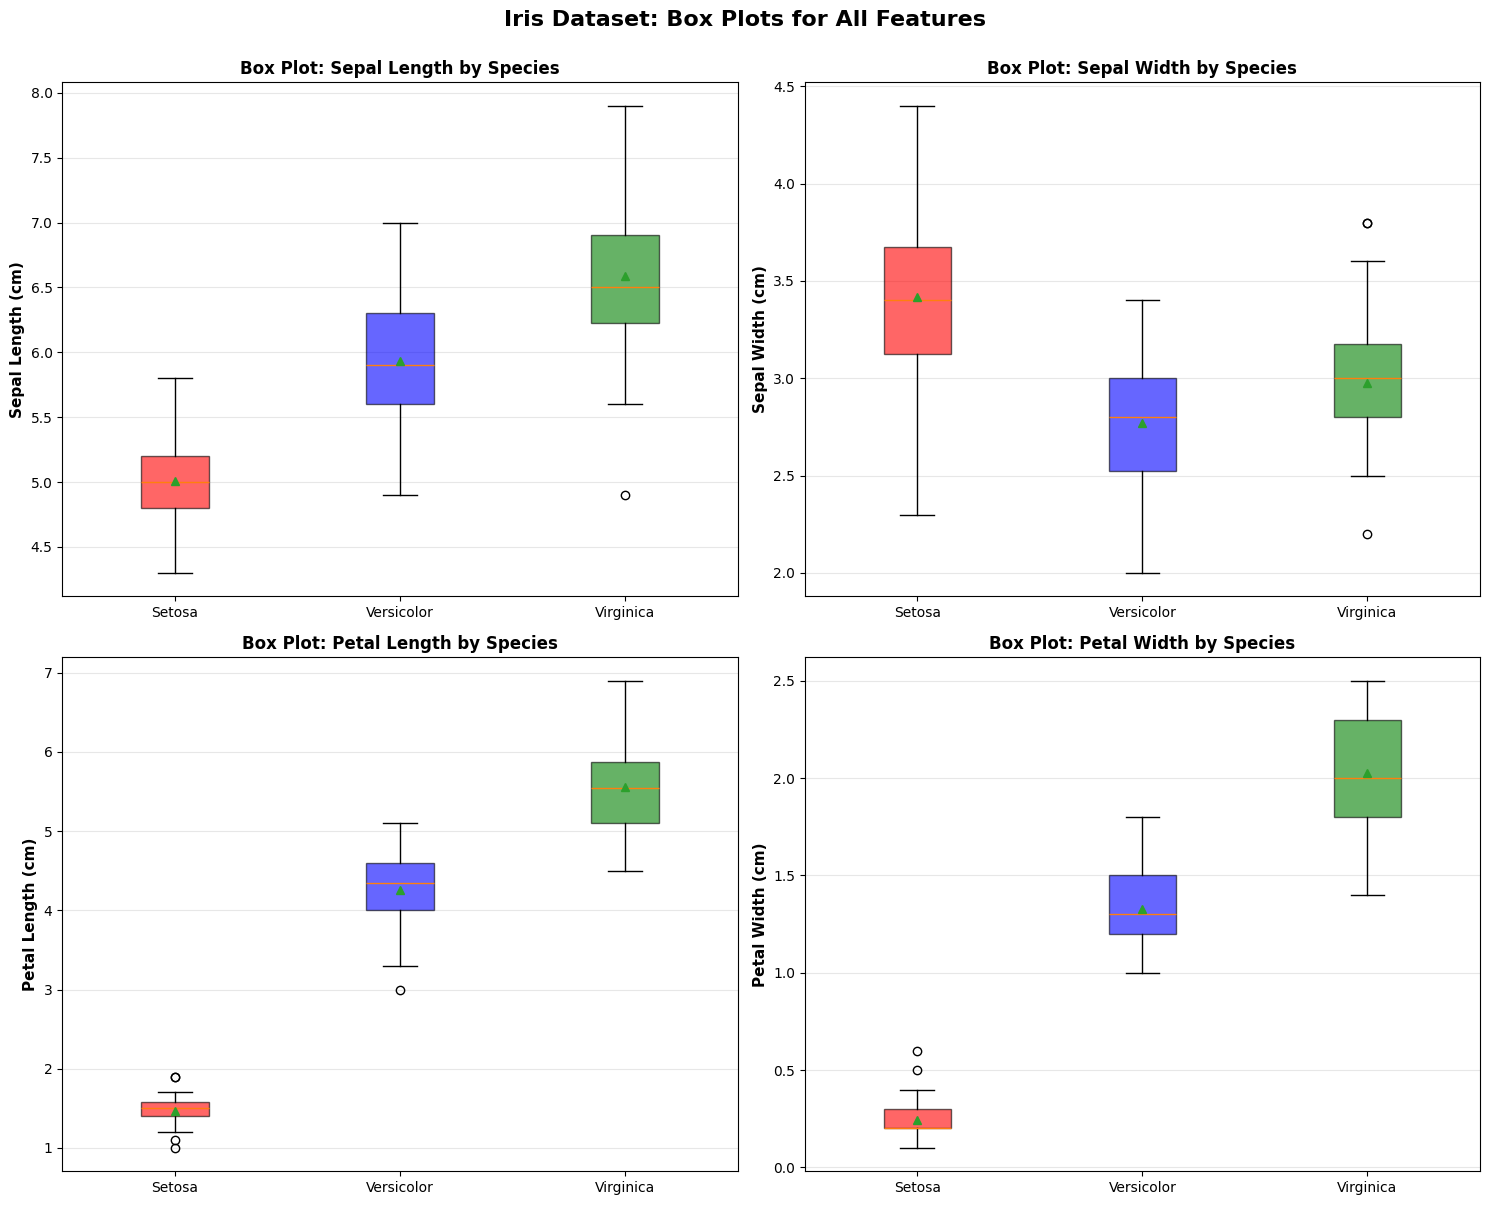

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    ax = axes[idx]
    
    data_by_species = [df_iris[df_iris['Species'] == species][feature].values 
                       for species in ['setosa', 'versicolor', 'virginica']]
    
    bp = ax.boxplot(data_by_species, labels=['Setosa', 'Versicolor', 'Virginica'],
                    patch_artist=True, showmeans=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], ['red', 'blue', 'green']):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    ax.set_ylabel(f'{feature} (cm)', fontsize=11, fontweight='bold')
    ax.set_title(f'Box Plot: {feature} by Species', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Iris Dataset: Box Plots for All Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


Generating pairwise scatter plots...


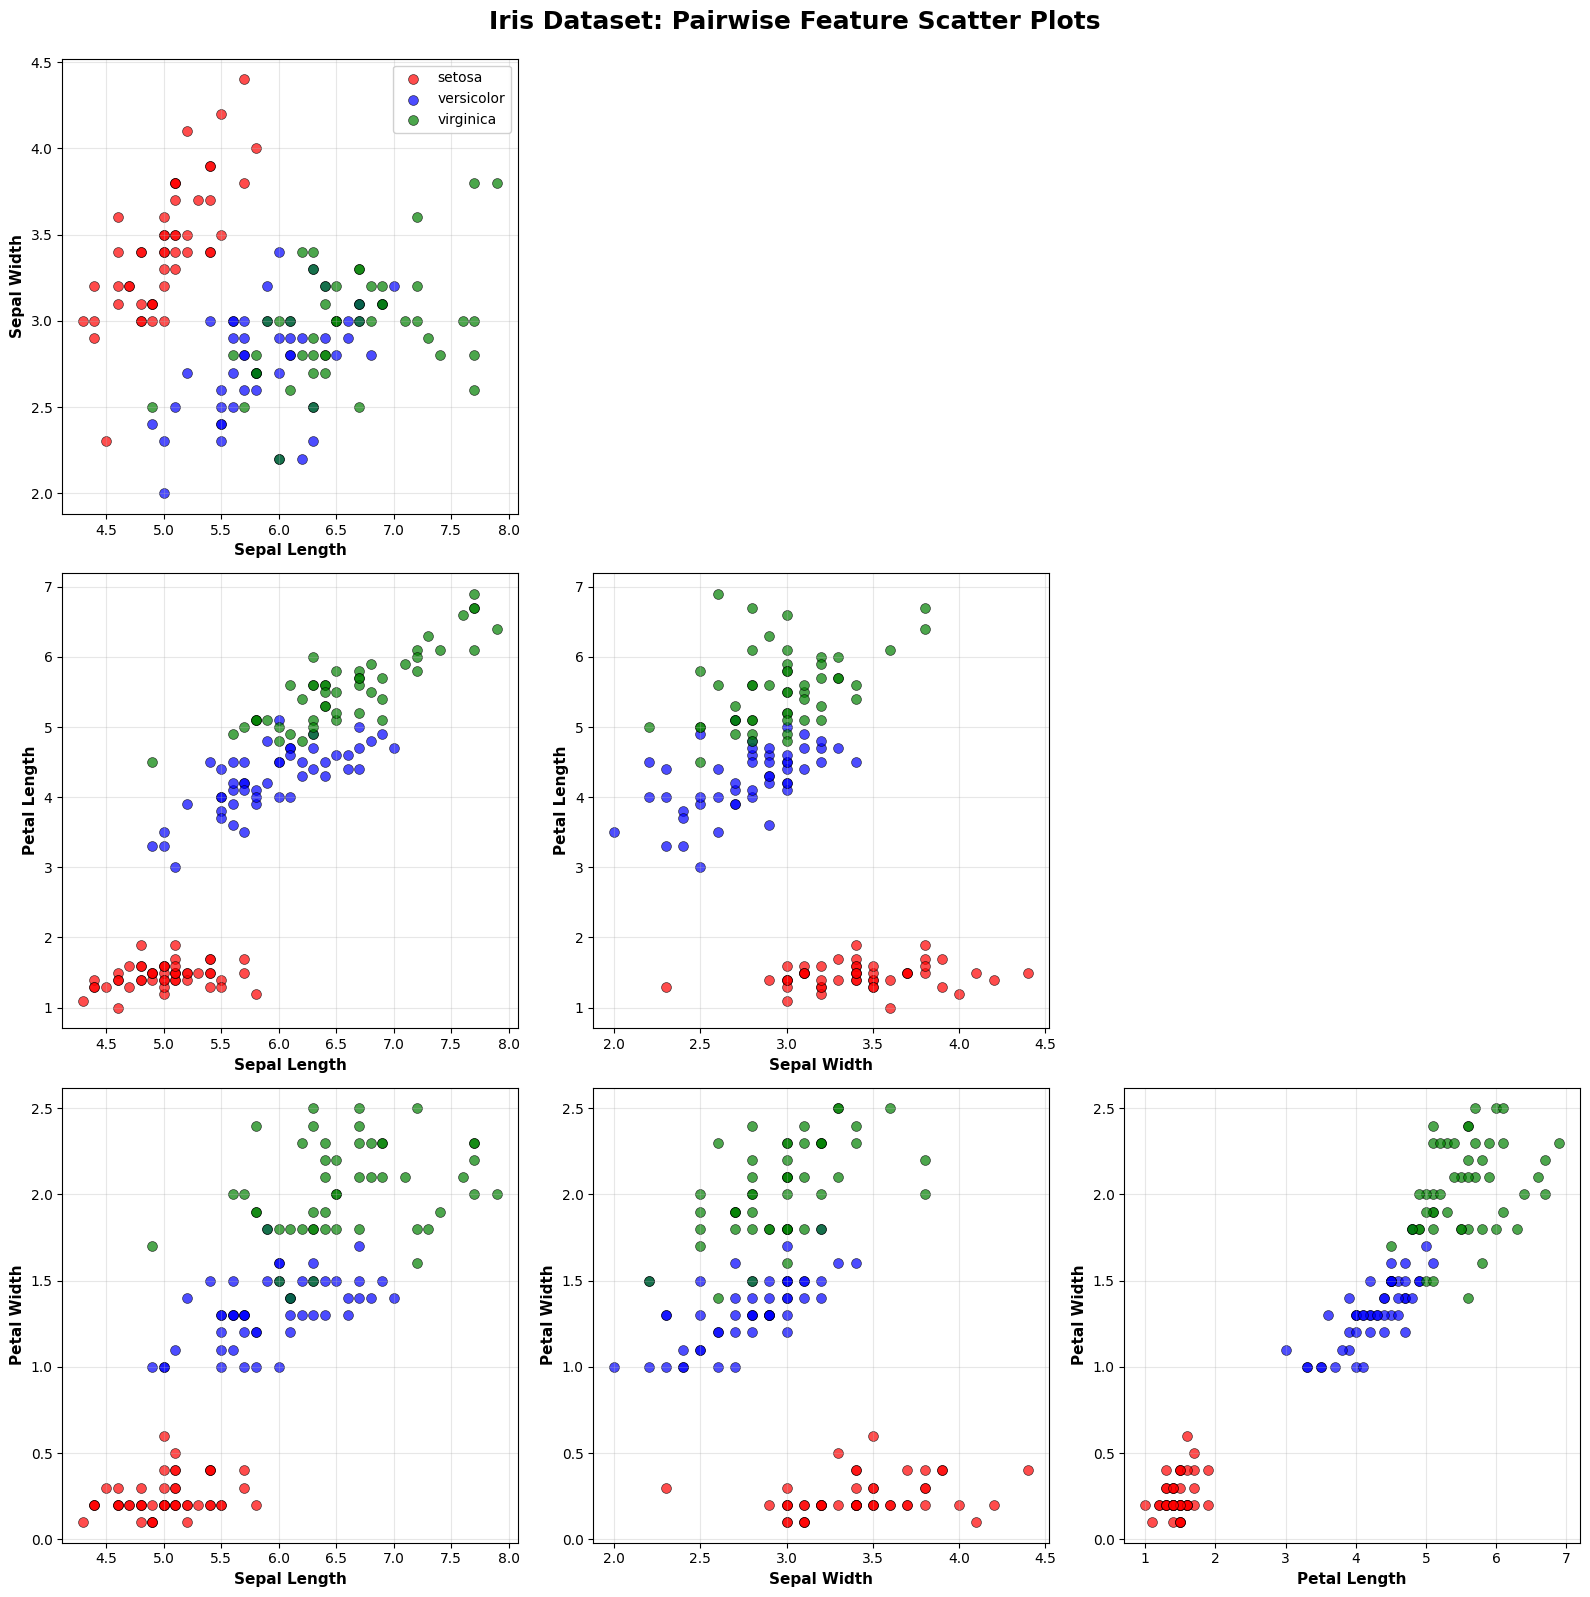

In [27]:
def visualize_iris_data(X, y):
    """
    Create scatter plots for all feature pairs colored by species.
    """
    n_features = X.shape[1]
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_features - 1, n_features - 1, figsize=(16, 16))
    fig.suptitle('Iris Dataset: Pairwise Feature Scatter Plots', fontsize=18, fontweight='bold', y=0.995)
    
    # Get unique classes and colors
    unique_classes = np.unique(y)
    colors = ['red', 'blue', 'green']
    
    for i in range(n_features):
        for j in range(n_features):
            if j >= i:
                continue
            
            ax = axes[i-1, j]
            
            # Plot each class with different color
            for idx, cls in enumerate(unique_classes):
                mask = y == cls
                ax.scatter(X[mask, j], X[mask, i], 
                          c=colors[idx], label=cls, 
                          alpha=0.7, edgecolors='black', linewidth=0.5, s=50)
            
            # Labels
            ax.set_xlabel(feature_names[j], fontsize=11, fontweight='bold')
            ax.set_ylabel(feature_names[i], fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3)
            
            # Legend only on first plot
            if i == 1 and j == 0:
                ax.legend(loc='best', fontsize=10, framealpha=0.9)
    
    # Remove empty subplots
    for i in range(n_features - 1):
        for j in range(i + 1, n_features - 1):
            fig.delaxes(axes[i, j])
    
    plt.tight_layout()
    plt.show()

# Generate pairwise scatter plots
print("\nGenerating pairwise scatter plots...")
visualize_iris_data(X, y)

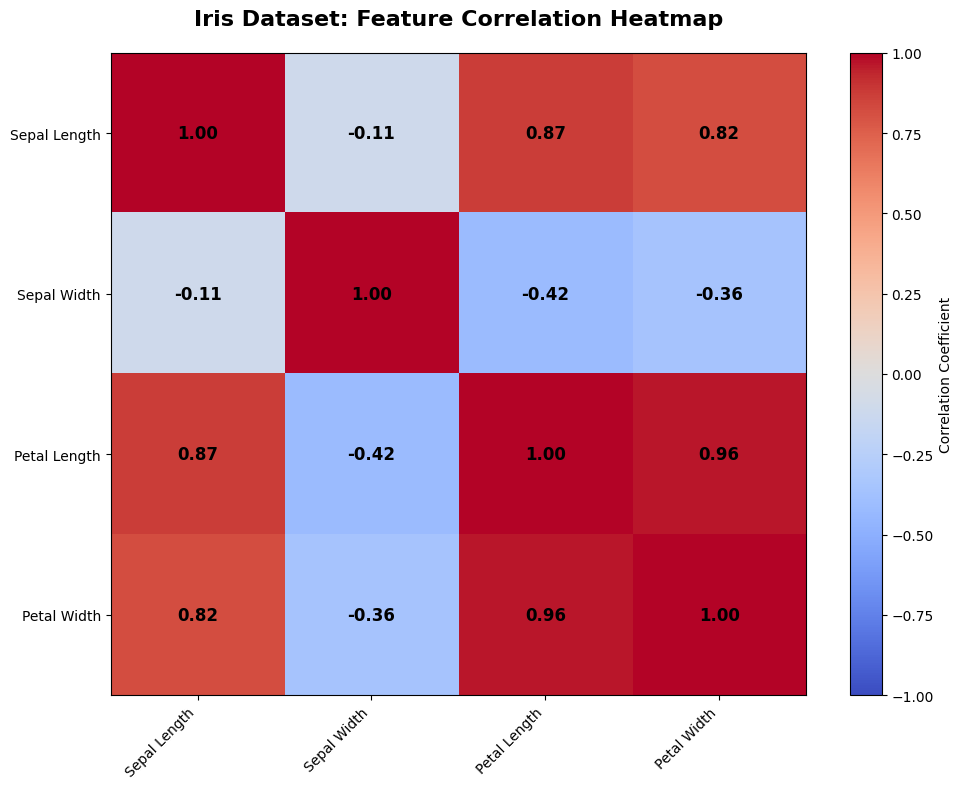

In [28]:
correlation_matrix = df_iris[feature_names].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Add text annotations
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=12, fontweight='bold')

plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
plt.yticks(range(len(feature_names)), feature_names)
plt.title('Iris Dataset: Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [30]:
print("\n FEATURE STATISTICS BY SPECIES")
print("-" * 70)
for feature in feature_names:
    print(f"\n{feature}:")
    print(df_iris.groupby('Species')[feature].agg(['mean', 'std', 'min', 'max']))

# Calculate feature separability (variance ratio)
print("\n6. FEATURE SEPARABILITY ANALYSIS")
print("-" * 70)
print("(Higher ratio = better class separation)")

for feature in feature_names:
    # Between-class variance
    class_means = df_iris.groupby('Species')[feature].mean()
    overall_mean = df_iris[feature].mean()
    between_var = ((class_means - overall_mean) ** 2).sum()
    
    # Within-class variance
    within_var = df_iris.groupby('Species')[feature].var().mean()
    
    # Separability ratio
    separability = between_var / within_var if within_var > 0 else 0
    
    print(f"{feature:20s}: {separability:.4f}")


 FEATURE STATISTICS BY SPECIES
----------------------------------------------------------------------

Sepal Length:
             mean       std  min  max
Species                              
setosa      5.006  0.352490  4.3  5.8
versicolor  5.936  0.516171  4.9  7.0
virginica   6.588  0.635880  4.9  7.9

Sepal Width:
             mean       std  min  max
Species                              
setosa      3.418  0.381024  2.3  4.4
versicolor  2.770  0.313798  2.0  3.4
virginica   2.974  0.322497  2.2  3.8

Petal Length:
             mean       std  min  max
Species                              
setosa      1.464  0.173511  1.0  1.9
versicolor  4.260  0.469911  3.0  5.1
virginica   5.552  0.551895  4.5  6.9

Petal Width:
             mean       std  min  max
Species                              
setosa      0.244  0.107210  0.1  0.6
versicolor  1.326  0.197753  1.0  1.8
virginica   2.026  0.274650  1.4  2.5

6. FEATURE SEPARABILITY ANALYSIS
---------------------------------------------

# 6. Model Integration and Evaluation 

Part A: Basic Model Evaluation

In [11]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate classification accuracy.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    
    Returns:
    --------
    accuracy : float
        Accuracy score
    """
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy

# Train and evaluate with k=3
print("="*60)
print("IRIS DATASET EVALUATION (k=3)")
print("="*60)
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

accuracy = calculate_accuracy(y_test, predictions)
print(f"\nClassification Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct Predictions: {np.sum(y_test == predictions)}/{len(y_test)}")


IRIS DATASET EVALUATION (k=3)
Model fitted with 120 training samples

Classification Accuracy: 1.0000 (100.00%)
Correct Predictions: 30/30


Part B: Hyperparameter Tuning


HYPERPARAMETER TUNING - Testing different k values
Model fitted with 120 training samples
k= 1 -> Accuracy: 1.0000 (100.00%)
Model fitted with 120 training samples
k= 3 -> Accuracy: 1.0000 (100.00%)
Model fitted with 120 training samples
k= 5 -> Accuracy: 1.0000 (100.00%)
Model fitted with 120 training samples
k= 7 -> Accuracy: 0.9667 (96.67%)
Model fitted with 120 training samples
k= 9 -> Accuracy: 1.0000 (100.00%)
Model fitted with 120 training samples
k=11 -> Accuracy: 1.0000 (100.00%)
Model fitted with 120 training samples
k=15 -> Accuracy: 1.0000 (100.00%)

Best k value: 1 with accuracy: 1.0000


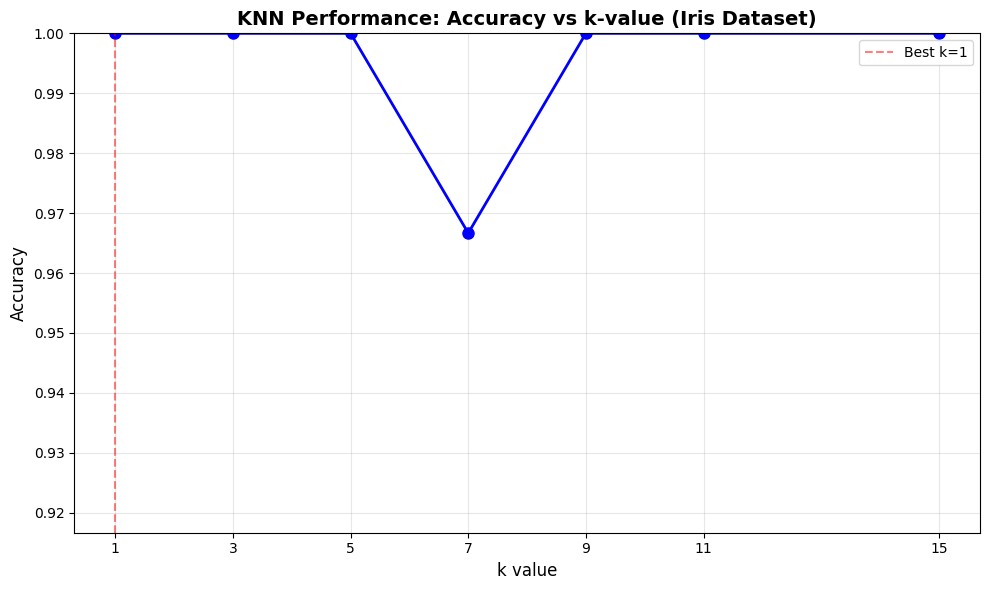

In [17]:
# Test different k values
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

print("\n" + "="*60)
print("HYPERPARAMETER TUNING - Testing different k values")
print("="*60)

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = calculate_accuracy(y_test, predictions)
    accuracies.append(accuracy)
    print(f"k={k:2d} -> Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Find best k
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f}")

# Plot Accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('k value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Performance: Accuracy vs k-value (Iris Dataset)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim([min(accuracies) - 0.05, 1.0])

# Highlight best k
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.5, label=f'Best k={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

Part C: Generalization to Wine Dataset

In [13]:
def load_wine_data():
    """
    Load and preprocess the Wine dataset from UCI repository.
    Returns: X (features) and y (labels) as NumPy arrays
    """
    wine = fetch_ucirepo(id=109)
    
    X = wine.data.features
    y = wine.data.targets
    
    # Convert to NumPy arrays
    X = X.to_numpy()
    y = y.to_numpy().ravel()  # Flatten to 1D array
    
    print(f"Wine Dataset loaded successfully!")
    print(f"Features shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Unique classes: {np.unique(y)}")
    
    return X, y

# Load Wine data
X_wine, y_wine = load_wine_data()

# Split Wine dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

print(f"\nWine Dataset Split:")
print(f"Training samples: {X_train_wine.shape[0]}")
print(f"Test samples: {X_test_wine.shape[0]}")

Wine Dataset loaded successfully!
Features shape: (178, 13)
Labels shape: (178,)
Unique classes: [1 2 3]

Wine Dataset Split:
Training samples: 143
Test samples: 35


Wine Dataset EXPLORATORY DATA ANALYSIS

In [36]:
print("\n" + "="*70)
print("WINE DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("="*70)
wine_dataset = fetch_ucirepo(id=109)
wine_feature_names = wine_dataset.data.features.columns.tolist()

# Create DataFrame using existing X_wine and y_wine
df_wine = pd.DataFrame(X_wine, columns=wine_feature_names)
df_wine['Class'] = y_wine
print("\n DATASET SHAPE AND STRUCTURE")
print("-" * 70)
print(f"Number of samples: {df_wine.shape[0]}")
print(f"Number of features: {df_wine.shape[1] - 1}")
print(f"Number of classes: {len(np.unique(y_wine))}")

print("\n CLASS DISTRIBUTION")
print("-" * 70)
class_counts_wine = df_wine['Class'].value_counts().sort_index()
print(class_counts_wine)
print(f"\nDataset is {'BALANCED' if class_counts_wine.std() < 10 else 'SLIGHTLY IMBALANCED'}")

print("\n STATISTICAL SUMMARY")
print("-" * 70)
print(df_wine.describe())

print("\n MISSING VALUES CHECK")
print("-" * 70)
missing_wine = df_wine.isnull().sum()
print(f"Total missing values: {missing_wine.sum()}")


WINE DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS

 DATASET SHAPE AND STRUCTURE
----------------------------------------------------------------------
Number of samples: 178
Number of features: 13
Number of classes: 3

 CLASS DISTRIBUTION
----------------------------------------------------------------------
Class
1    59
2    71
3    48
Name: count, dtype: int64

Dataset is SLIGHTLY IMBALANCED

 STATISTICAL SUMMARY
----------------------------------------------------------------------
          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000      

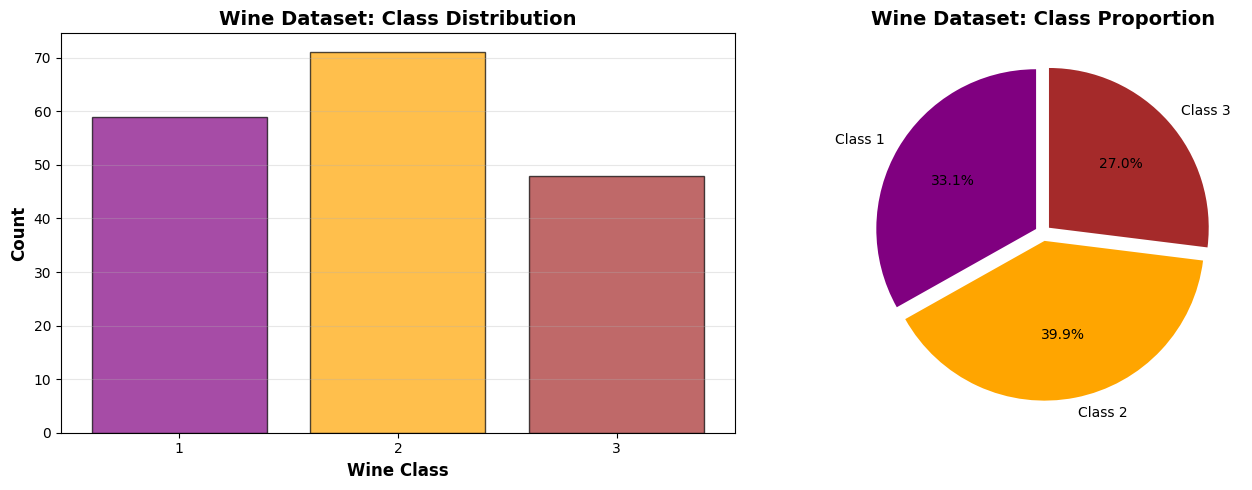

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts_wine = df_wine['Class'].value_counts().sort_index()
axes[0].bar(class_counts_wine.index, class_counts_wine.values, 
            color=['purple', 'orange', 'brown'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Wine Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Wine Dataset: Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks([1, 2, 3])
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(class_counts_wine.values, labels=[f'Class {i}' for i in class_counts_wine.index], 
            autopct='%1.1f%%', colors=['purple', 'orange', 'brown'], 
            startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Wine Dataset: Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

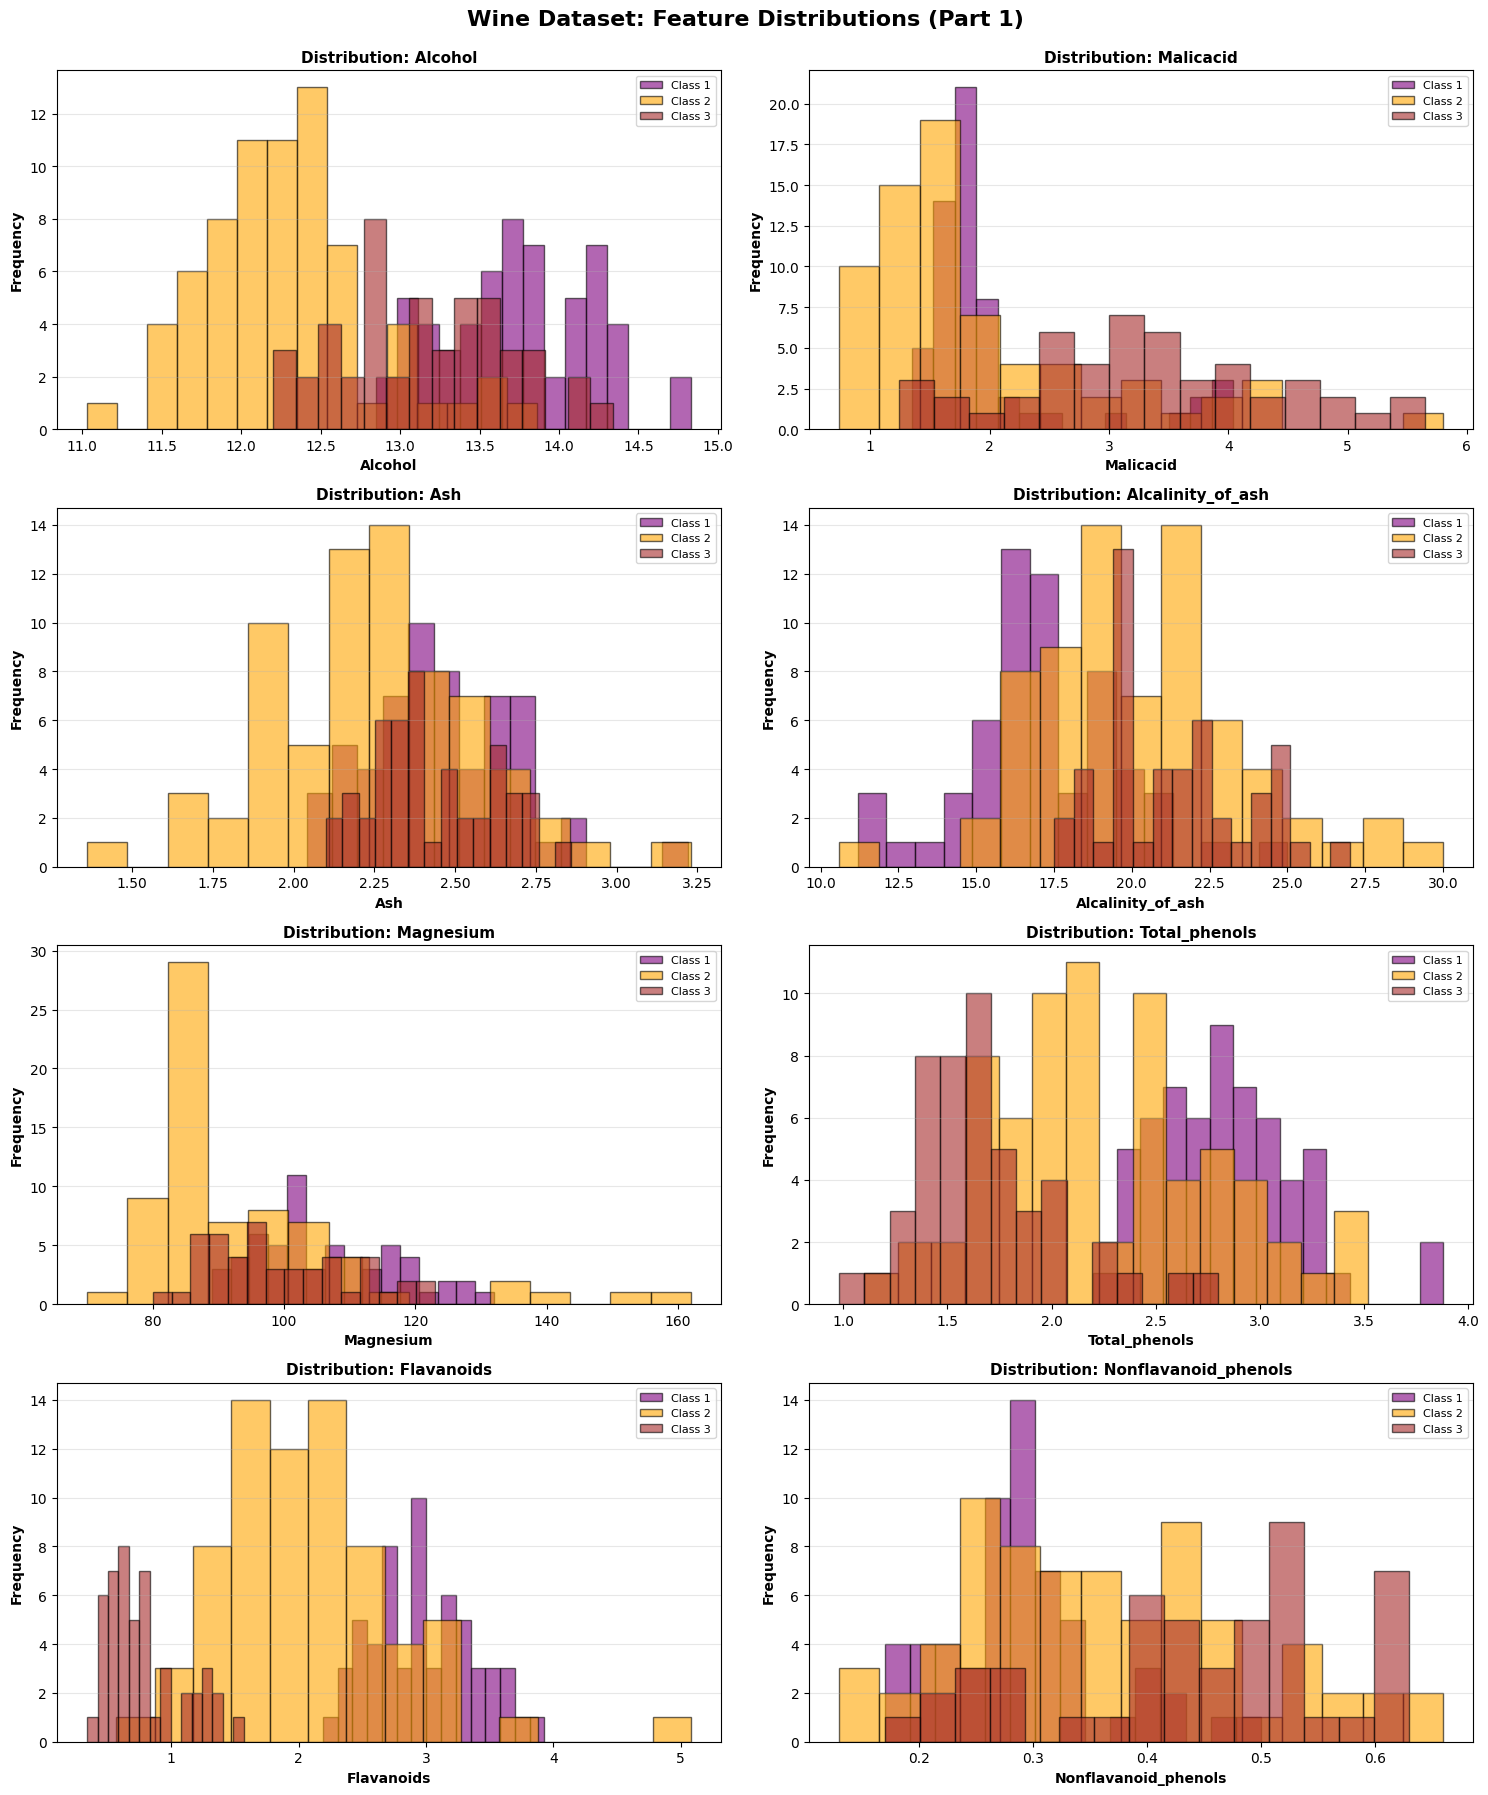

In [38]:
fig, axes = plt.subplots(4, 2, figsize=(15, 18))
axes = axes.ravel()

colors_wine = {1: 'purple', 2: 'orange', 3: 'brown'}

for idx, feature in enumerate(wine_feature_names[:8]):
    ax = axes[idx]
    
    for wine_class in sorted(df_wine['Class'].unique()):
        data = df_wine[df_wine['Class'] == wine_class][feature]
        ax.hist(data, bins=15, alpha=0.6, label=f'Class {wine_class}', 
                color=colors_wine[wine_class], edgecolor='black')
    
    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax.set_title(f'Distribution: {feature}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Wine Dataset: Feature Distributions (Part 1)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/1406512139.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_class, labels=['Class 1', 'Class 2', 'Class 3'],
/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/1406512139.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_class, labels=['Class 1', 'Class 2', 'Class 3'],
/var/folders/2j/6bvnywcd4k76ggrbfxbv4ckc0000gn/T/ipykernel_20852/1406512139.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_class, labels=['Class 1', 'Class 2', 'Class 3'],
/var/folders/2j/6bv

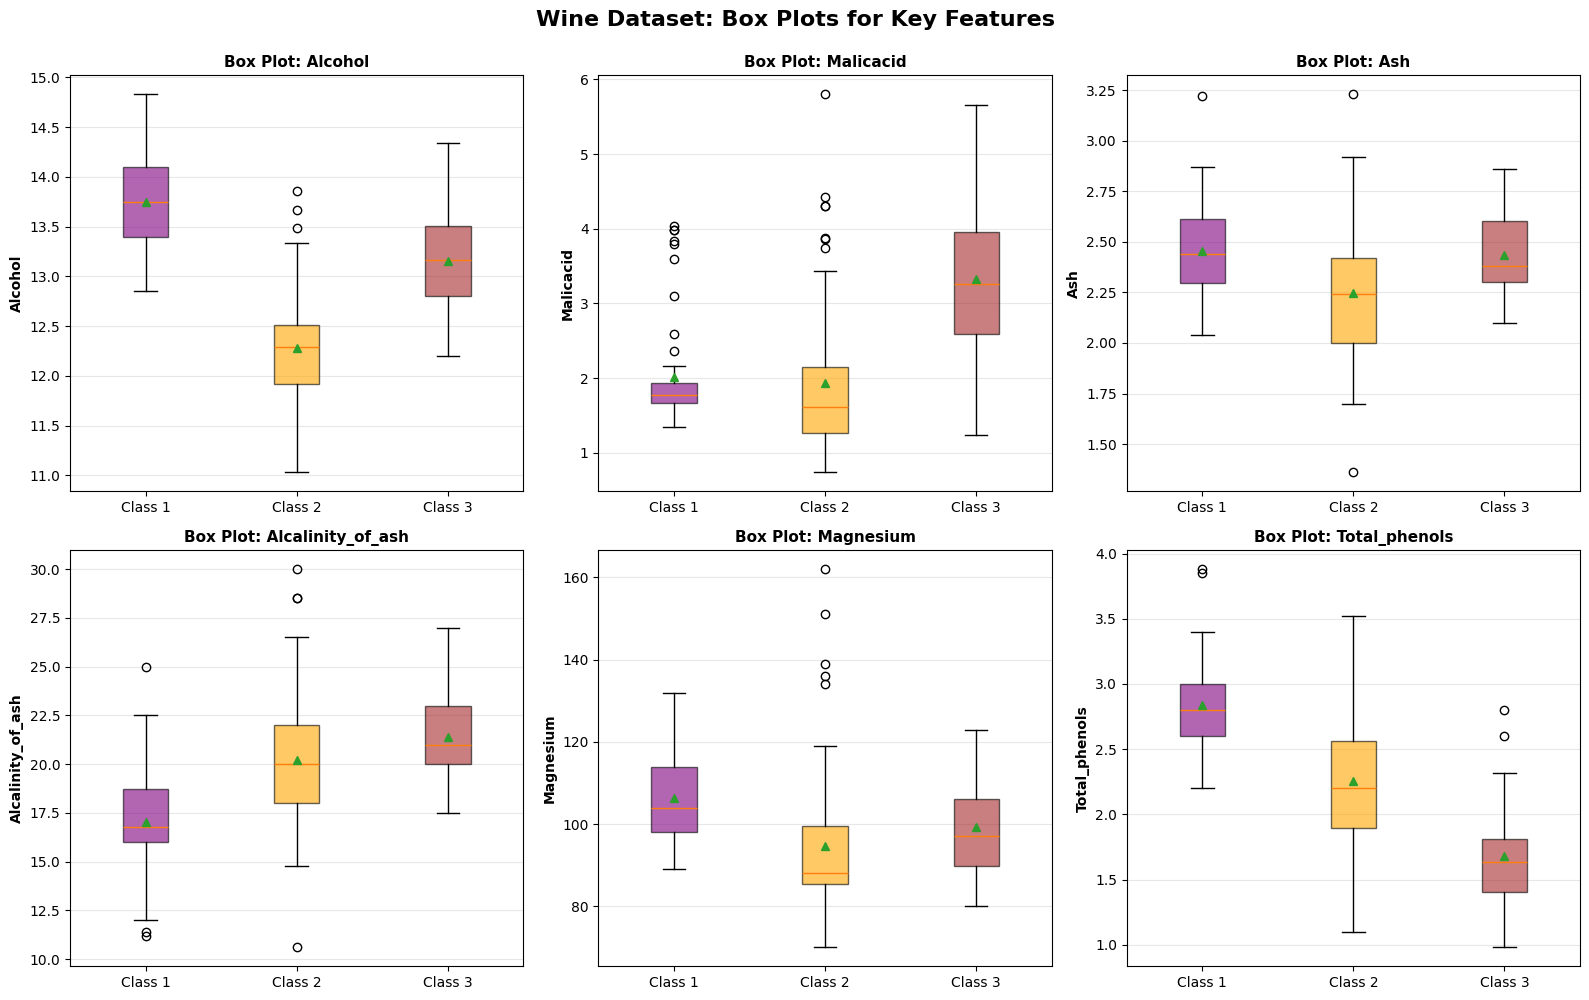

In [39]:
important_features = wine_feature_names[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(important_features):
    ax = axes[idx]
    
    data_by_class = [df_wine[df_wine['Class'] == wine_class][feature].values 
                     for wine_class in [1, 2, 3]]
    
    bp = ax.boxplot(data_by_class, labels=['Class 1', 'Class 2', 'Class 3'],
                    patch_artist=True, showmeans=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], ['purple', 'orange', 'brown']):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    ax.set_ylabel(feature, fontsize=10, fontweight='bold')
    ax.set_title(f'Box Plot: {feature}', fontsize=11, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Wine Dataset: Box Plots for Key Features', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


Top 4 Most Discriminative Features:
  Flavanoids                    : 9.9767
  0D280_0D315_of_diluted_wines  : 7.9654
  Proline                       : 6.9428
  Hue                           : 4.2531


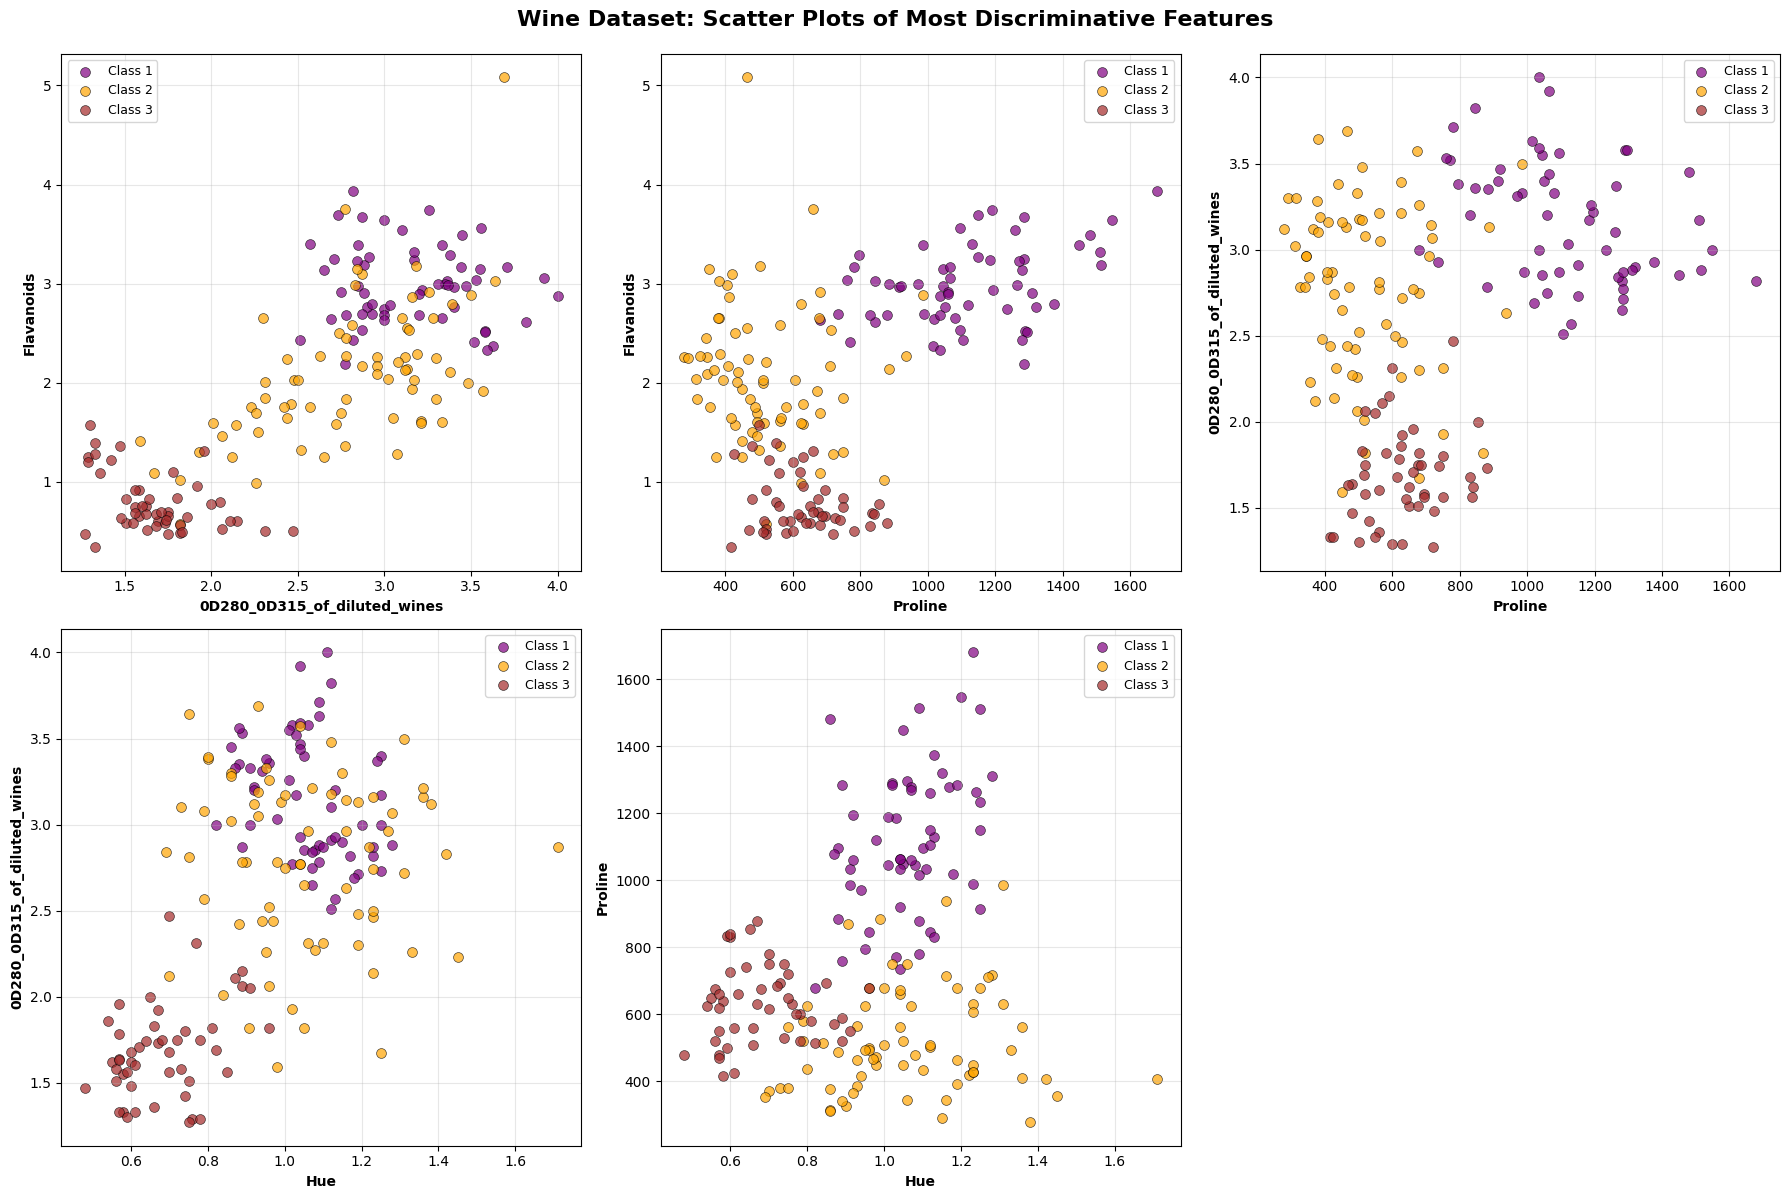

In [40]:
feature_separability = {}
for feature in wine_feature_names:
    class_means = df_wine.groupby('Class')[feature].mean()
    overall_mean = df_wine[feature].mean()
    between_var = ((class_means - overall_mean) ** 2).sum()
    within_var = df_wine.groupby('Class')[feature].var().mean()
    feature_separability[feature] = between_var / within_var if within_var > 0 else 0

# Get top 4 features
top_features = sorted(feature_separability.items(), key=lambda x: x[1], reverse=True)[:4]
top_feature_names = [f[0] for f in top_features]

print("\nTop 4 Most Discriminative Features:")
for fname, score in top_features:
    print(f"  {fname:30s}: {score:.4f}")


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

plot_idx = 0
for i in range(len(top_feature_names)):
    for j in range(i+1, min(i+3, len(top_feature_names))):
        if plot_idx >= 6:
            break
        
        ax = axes[plot_idx]
        
        for wine_class in sorted(df_wine['Class'].unique()):
            mask = df_wine['Class'] == wine_class
            ax.scatter(df_wine[mask][top_feature_names[j]], 
                      df_wine[mask][top_feature_names[i]], 
                      c=colors_wine[wine_class], 
                      label=f'Class {wine_class}', 
                      alpha=0.7, edgecolors='black', linewidth=0.5, s=50)
        
        ax.set_xlabel(top_feature_names[j], fontsize=10, fontweight='bold')
        ax.set_ylabel(top_feature_names[i], fontsize=10, fontweight='bold')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3)
        
        plot_idx += 1

# Remove unused subplots
for idx in range(plot_idx, 6):
    fig.delaxes(axes[idx])

plt.suptitle('Wine Dataset: Scatter Plots of Most Discriminative Features', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


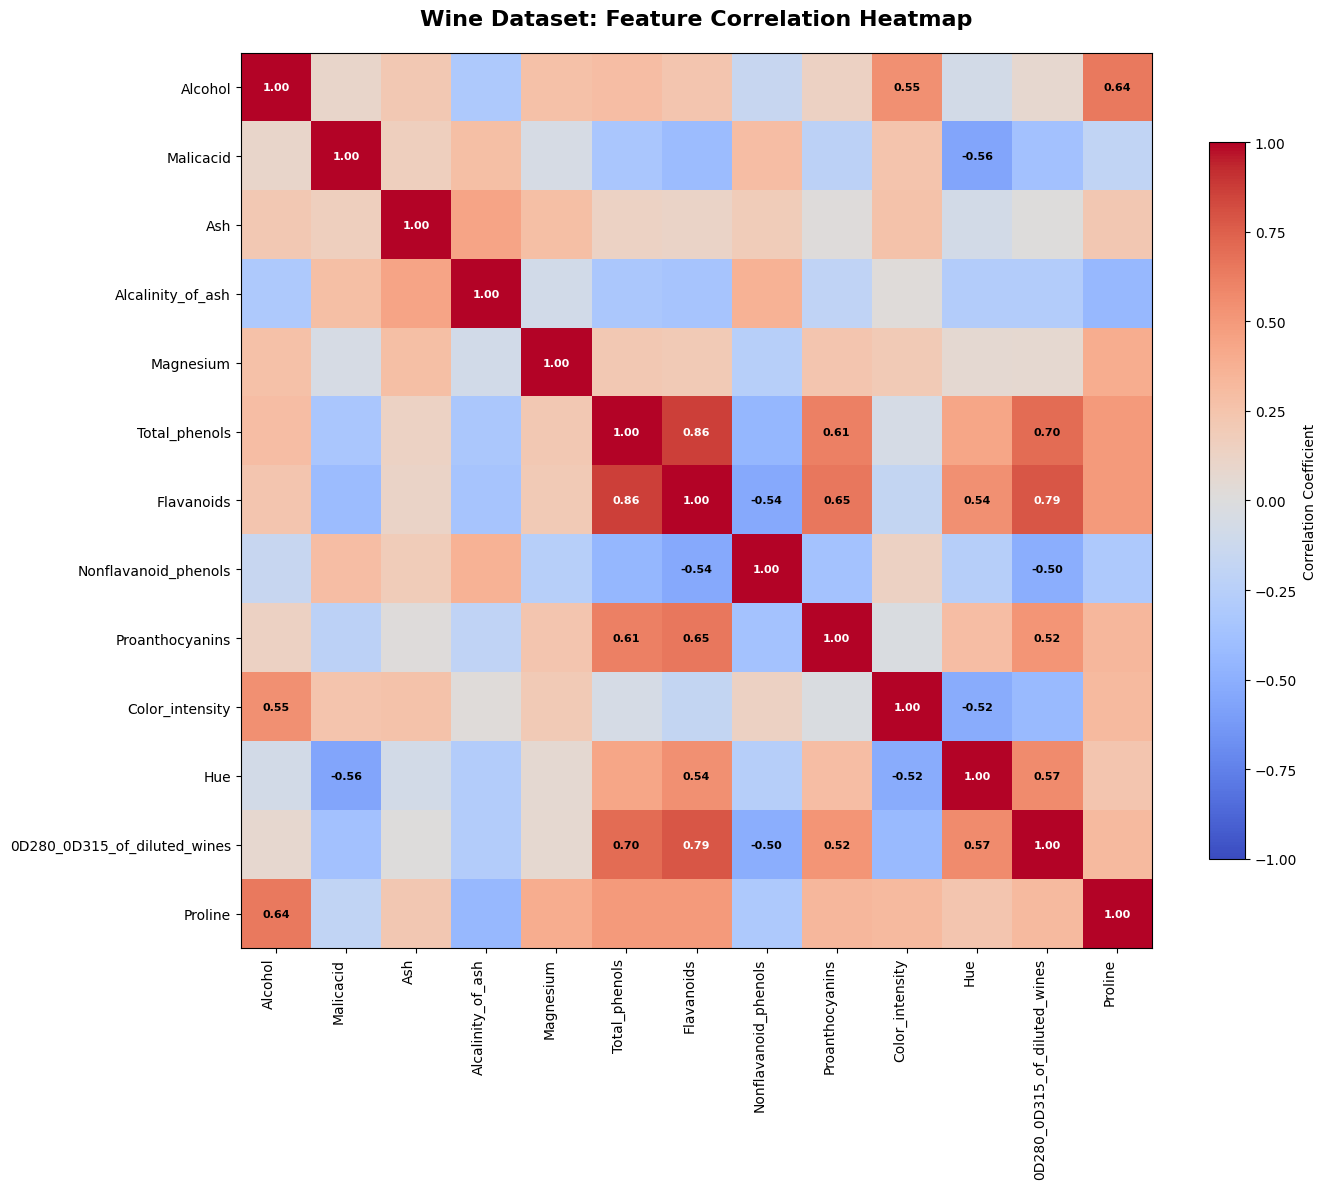

In [41]:
correlation_matrix_wine = df_wine[wine_feature_names].corr()

plt.figure(figsize=(14, 12))
plt.imshow(correlation_matrix_wine, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient', shrink=0.8)

# Add text annotations for high correlations only
for i in range(len(wine_feature_names)):
    for j in range(len(wine_feature_names)):
        corr_val = correlation_matrix_wine.iloc[i, j]
        if abs(corr_val) > 0.5 or i == j:
            text = plt.text(j, i, f'{corr_val:.2f}',
                           ha="center", va="center", 
                           color="black" if abs(corr_val) < 0.7 else "white", 
                           fontsize=8, fontweight='bold')

plt.xticks(range(len(wine_feature_names)), wine_feature_names, rotation=90, ha='right')
plt.yticks(range(len(wine_feature_names)), wine_feature_names)
plt.title('Wine Dataset: Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [51]:
print("\n FEATURE STATISTICS BY CLASS")
print("-" * 70)
for i, name in enumerate(wine_feature_names, 1):
    print(f"{i}. {name}")
    print(df_wine.groupby('Class')[name].agg(['mean', 'std', 'min', 'max']))
    print("-" * 70)



 FEATURE STATISTICS BY CLASS
----------------------------------------------------------------------
1. Alcohol
            mean       std    min    max
Class                                   
1      13.744746  0.462125  12.85  14.83
2      12.278732  0.537964  11.03  13.86
3      13.153750  0.530241  12.20  14.34
----------------------------------------------------------------------
2. Malicacid
           mean       std   min   max
Class                                
1      2.010678  0.688549  1.35  4.04
2      1.932676  1.015569  0.74  5.80
3      3.333750  1.087906  1.24  5.65
----------------------------------------------------------------------
3. Ash
           mean       std   min   max
Class                                
1      2.455593  0.227166  2.04  3.22
2      2.244789  0.315467  1.36  3.23
3      2.437083  0.184690  2.10  2.86
----------------------------------------------------------------------
4. Alcalinity_of_ash
            mean       std   min   max
Class     

In [52]:
# Calculate feature separability
print("\n FEATURE SEPARABILITY ANALYSIS (Top 10)")
print("-" * 70)
print("(Higher ratio = better class separation)\n")

sorted_features = sorted(feature_separability.items(), key=lambda x: x[1], reverse=True)[:10]
for feature, score in sorted_features:
    print(f"{feature:30s}: {score:.4f}")


 FEATURE SEPARABILITY ANALYSIS (Top 10)
----------------------------------------------------------------------
(Higher ratio = better class separation)

Flavanoids                    : 9.9767
0D280_0D315_of_diluted_wines  : 7.9654
Proline                       : 6.9428
Hue                           : 4.2531
Alcohol                       : 4.2020
Total_phenols                 : 3.7702
Color_intensity               : 3.7160
Malicacid                     : 1.4100
Alcalinity_of_ash             : 1.3531
Proanthocyanins               : 1.2350


Wine Dataset Evaluation


WINE DATASET EVALUATION (k=1)
Model fitted with 143 training samples

Classification Accuracy: 0.7714 (77.14%)
Correct Predictions: 27/35

HYPERPARAMETER TUNING - Wine Dataset
Model fitted with 143 training samples
k= 1 -> Accuracy: 0.7714 (77.14%)
Model fitted with 143 training samples
k= 3 -> Accuracy: 0.8000 (80.00%)
Model fitted with 143 training samples
k= 5 -> Accuracy: 0.7429 (74.29%)
Model fitted with 143 training samples
k= 7 -> Accuracy: 0.6857 (68.57%)
Model fitted with 143 training samples
k= 9 -> Accuracy: 0.7429 (74.29%)
Model fitted with 143 training samples
k=11 -> Accuracy: 0.7714 (77.14%)
Model fitted with 143 training samples
k=15 -> Accuracy: 0.7429 (74.29%)


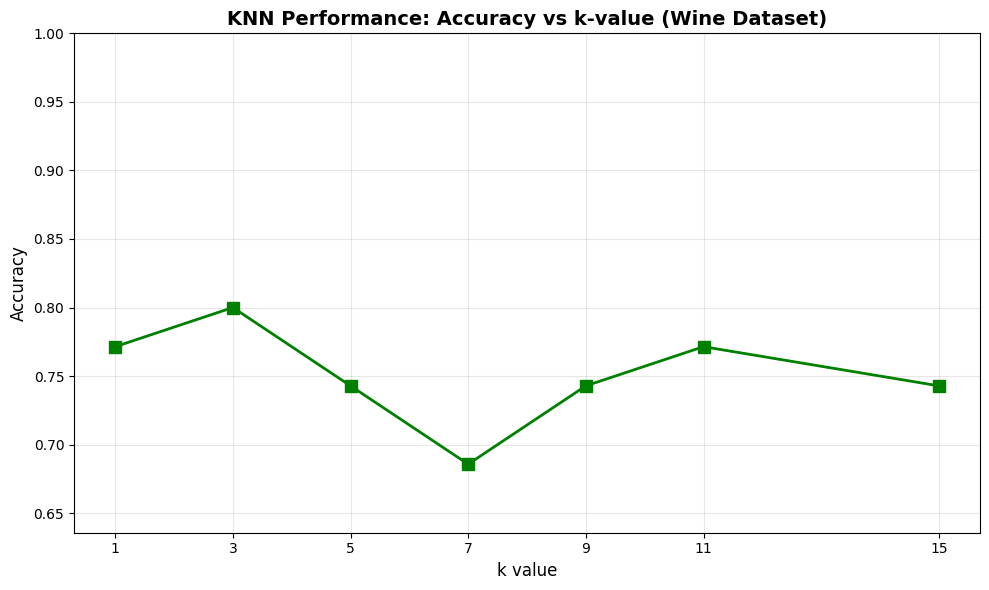

In [14]:
print("\n" + "="*60)
print(f"WINE DATASET EVALUATION (k={best_k})")
print("="*60)

# Train with best k from Iris dataset
knn_wine = KNNClassifier(k=best_k)
knn_wine.fit(X_train_wine, y_train_wine)
predictions_wine = knn_wine.predict(X_test_wine)

accuracy_wine = calculate_accuracy(y_test_wine, predictions_wine)
print(f"\nClassification Accuracy: {accuracy_wine:.4f} ({accuracy_wine*100:.2f}%)")
print(f"Correct Predictions: {np.sum(y_test_wine == predictions_wine)}/{len(y_test_wine)}")

# Test different k values on Wine dataset
print("\n" + "="*60)
print("HYPERPARAMETER TUNING - Wine Dataset")
print("="*60)

accuracies_wine = []
for k in k_values:
    knn_wine = KNNClassifier(k=k)
    knn_wine.fit(X_train_wine, y_train_wine)
    predictions_wine = knn_wine.predict(X_test_wine)
    accuracy = calculate_accuracy(y_test_wine, predictions_wine)
    accuracies_wine.append(accuracy)
    print(f"k={k:2d} -> Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Plot Wine dataset results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_wine, marker='s', linewidth=2, markersize=8, color='green')
plt.xlabel('k value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Performance: Accuracy vs k-value (Wine Dataset)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim([min(accuracies_wine) - 0.05, 1.0])
plt.tight_layout()
plt.show()

Summary and Conclusions

In [15]:
# Summarize final results programmatically
final_summary = pd.DataFrame({
    "Dataset": ["Iris", "Wine"],
    "Best k": [best_k, k_values[np.argmax(accuracies_wine)]],
    "Accuracy": [f"{best_accuracy*100:.2f}%", f"{max(accuracies_wine)*100:.2f}%"]
})

print("\nFinal Performance Summary:")
display(final_summary)



Final Performance Summary:


,Dataset,Best k,Accuracy
0,Iris,1,100.00%
1,Wine,3,80.00%


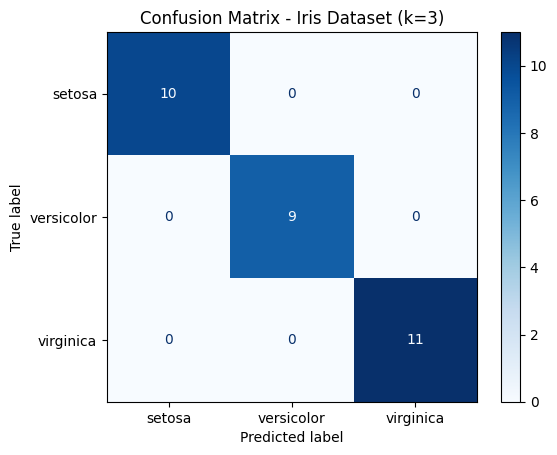

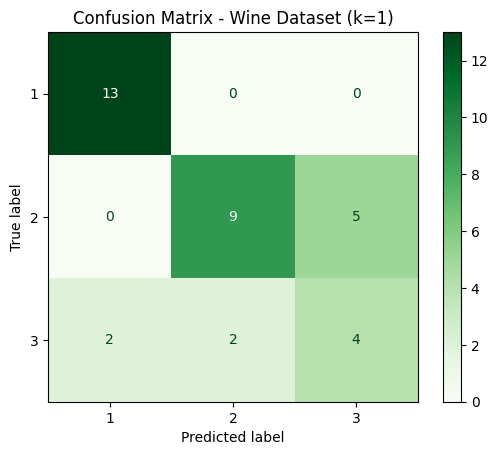

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Iris
cm = confusion_matrix(y_test, predictions, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Iris Dataset (k=3)")
plt.show()

# Confusion Matrix for Wine
cm_wine = confusion_matrix(y_test_wine, predictions_wine, labels=np.unique(y_wine))
disp_wine = ConfusionMatrixDisplay(confusion_matrix=cm_wine, display_labels=np.unique(y_wine))
disp_wine.plot(cmap='Greens')
plt.title(f"Confusion Matrix - Wine Dataset (k={best_k})")
plt.show()


Saved result files: Experiment6_KNN_Results.csv, Iris_Accuracy_vs_k.png, Wine_Accuracy_vs_k.png


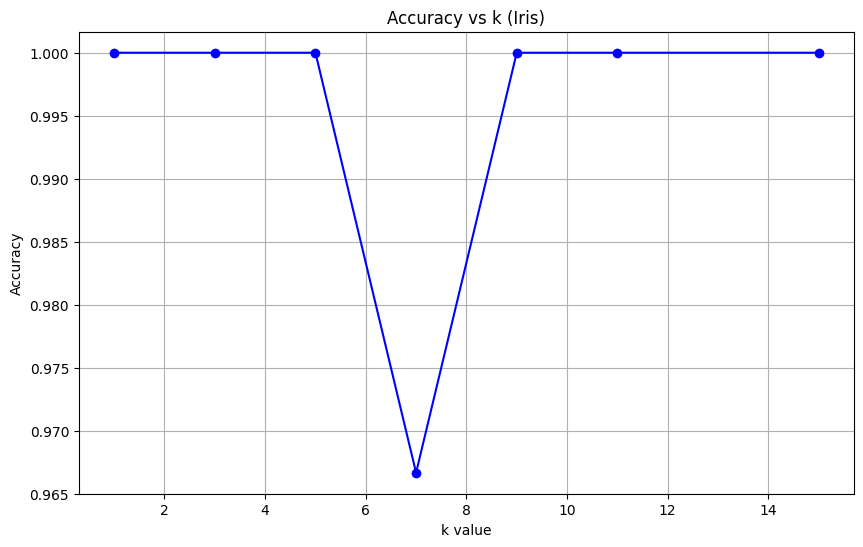

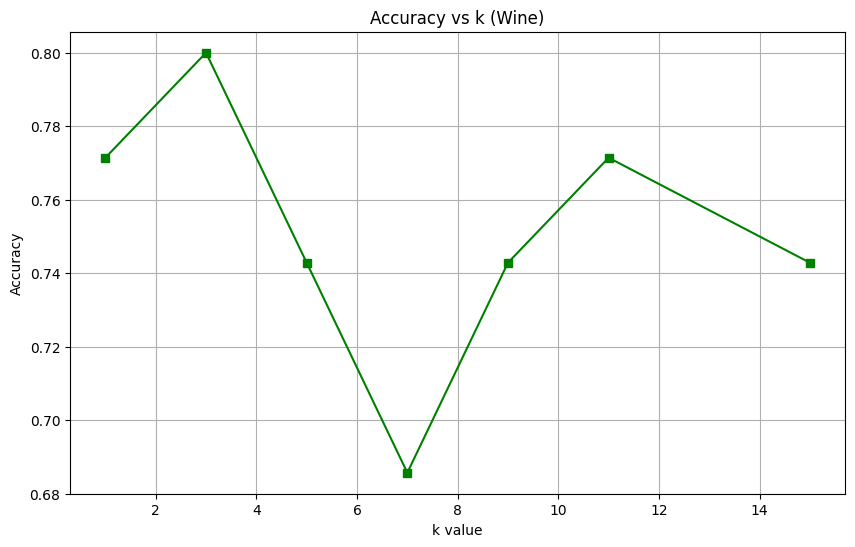

In [19]:
# Save results to CSV for report
final_summary.to_csv("Experiment6_KNN_Results.csv", index=False)

# Save Accuracy vs K plots as PNGs
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("Accuracy vs k (Iris)")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("Iris_Accuracy_vs_k.png", dpi=300)

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies_wine, marker='s', color='green')
plt.title("Accuracy vs k (Wine)")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("Wine_Accuracy_vs_k.png", dpi=300)

print("Saved result files: Experiment6_KNN_Results.csv, Iris_Accuracy_vs_k.png, Wine_Accuracy_vs_k.png")